In [1]:
# 참조 https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

* Feature Description:
  * rating: 이용자 리뷰의 평가 점수 (1~5)
  * text: 이용자 리뷰 평가 내용

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 448 kB 67.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/tripadviser_review.csv")

df.head()

,rating,text
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입..."
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...


In [5]:
df.shape

(1001, 2)

In [6]:
# 결측치
df.isnull().sum()

rating    0
text      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1001 non-null   int64 
 1   text    1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# text 변수 확인

df['text'][0]

# “text” 내용을 확인해보면, 소량의 "특수 문자"와 "모음"이 존재하는 경우가 있다. 
# 이것들은 Text Mining을 적용할 의미가 없기 때문에 정규표현식을 이용해서 제거.

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

* 한국어 텍스트 데이터 전처리:
  * 기계가 텍스트 형식으로 되어 있는 리뷰 데이터를 이해하려면, 텍스트 데이터를 단어 단위로 분리하는 전처리 과정이 필요합니다. 여기서 분리된 단어들은 Bag of Words로 Count 기반으로 나타날 수도 있고, TF-IDF를 통해서 점수로 나타날 수도 있습니다.
먼저 리뷰의 평가 내용을 단어화해서 형태소를 추출하고, 그 다음 Bag of Words를 생성하여 TF-IDF 변환을 진행하겠습니다.

정규 표현식 적용

In [9]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [10]:
df['text'][0]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.'

In [11]:
# 정규 표현식 적용 후
apply_regular_expression(df['text'][0])

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다'

 * 한국어 형태소 분석 - 명사 단위
  * 명사 형태소 추출

In [12]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태']

In [13]:
# 말뭉치 생성
corpus = "".join(df['text'].tolist())
corpus[:100]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다.2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메'

In [14]:
# 정규 표현식 적용
apply_regular_expression(corpus)[:100]

'여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다 위치선정 또한 적당한 편이었고 청소나 청결상태도 좋았습니다일 이상 연박시 침대 이불 베게등 침구류 교체 및 어메니티 보강'

In [15]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['여행', '집중', '휴식', '제공', '호텔', '위치', '선정', '또한', '청소', '청결', '상태', '일', '이상', '연', '침대', '이불', '등', '침구', '류', '교체', '및', '어메니티', '보강', '베스트', '웨스턴', '회원', '경우', '객실', '뷰', '층수', '요청', '적극', '반영', '지인', '소개', '온', '호텔', '거', '처음', '당황', '세면', '도구', '잠옷', '필수', '그것', '방', '눈', '정도', '호텔', '처음', '것', '다음', '제주도', '꼭', '여기', '박만', '저녁', '맥주', '한잔', '렌트', '안', '뚜벅', '호텔', '바로', '앞', '버스', '정류', '시', '도착', '가방', '일찍', '정비', '방이', '바로', '입실', '룸', '업그레이드', '직원', '정말', '바다', '전망', '영', '전일', '함덕', '대명', '콘도', '곳', '실내', '분위기', '바다', '전망', '훨', '손님', '날', '가장', '바다', '방', '배치', '대해', '바로', '대응', '써비스', '조식', '부분', '신경', '아주', '특급', '호텔', '트랜디', '대해', '고민', '흔적', '여름', '꼭', '수영장', '사용', '보고', '엄마', '둘', '여행', '가격', '대비', '위치', '주위', '마트', '식당', '시장', '앞', '바다', '더', '또', '방문', '의사', '딸', '둘', '동안', '제주', '여행', '줌', '박', '숙소', '정해진', '제주', '휘슬', '락', '호텔', '처음', '공항', '곳', '생각', '시설', '직원', '모두', '친절', '모드', '여행', '마지막', '마무리', '테라스', '전경', '인근', '재래시장', '야시장', '이용도', '다음', '또', '이용', '제주', '여행'

In [16]:
# 빈도 탐색
counter = Counter(nouns)

counter.most_common(10)

[('호텔', 803),
 ('수', 498),
 ('것', 436),
 ('방', 330),
 ('위치', 328),
 ('우리', 327),
 ('곳', 320),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264)]

* 한글자 명사 제거:
  * 위 결과에서 보이듯이, 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보입니다. 그래서 우리는 한글자 명사를 제거해보도록 하겠습니다.

In [17]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

# 이제 한글자 키워드 모두 제거됐습니다.
# 하지만 “우리”, “매우” 와 같은 실질적인 의미가 없고 꾸민 역할을 하는 불용어들 아직 존재합니다. 
# 한국어 불용어 사전을 정의하여 불용어도 제거

[('호텔', 803),
 ('위치', 328),
 ('우리', 327),
 ('공항', 307),
 ('직원', 267),
 ('매우', 264),
 ('가격', 245),
 ('객실', 244),
 ('시설', 215),
 ('제주', 192)]

* 불용어 사전

In [18]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]


[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [19]:
# 우리가 분석하고자 하는 데이터셋에 특화된 불용어들이 있습니다. 
# 예를 들면: “제주”, “호텔”, “숙소” 등. 이런 단어들도 불용어 사전에 추가

jeju_hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_hotel_stopwords:
    stopwords.append(word)

* Word Count
  * Bow 벡터 생성

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())

# 단어 리스트
word_list = vect.get_feature_names()
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list = bow_vect.toarray().sum(axis=0)

In [21]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

print(bow_vect.shape)

(1001, 3599)


In [22]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 4,
 '가게': 8,
 '가격': 245,
 '가격표': 1,
 '가구': 8,
 '가급': 1,
 '가기': 20,
 '가까이': 20,
 '가끔': 5,
 '가능': 10,
 '가도': 7,
 '가동': 2,
 '가두': 1,
 '가득': 2,
 '가든': 1,
 '가라': 3,
 '가량': 1,
 '가려움': 1,
 '가로': 2,
 '가면': 14,
 '가몬': 1,
 '가무': 1,
 '가물': 1,
 '가미': 1,
 '가방': 4,
 '가버': 1,
 '가성': 49,
 '가세': 3,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 1,
 '가시': 4,
 '가신': 3,
 '가야': 10,
 '가옥': 1,
 '가요': 5,
 '가용': 1,
 '가운데': 3,
 '가을': 4,
 '가인': 1,
 '가장': 42,
 '가정': 4,
 '가정식': 2,
 '가족': 94,
 '가지': 55,
 '가짓수': 3,
 '가차': 1,
 '가치': 15,
 '가품': 1,
 '각각': 7,
 '각오': 1,
 '각자': 2,
 '각종': 3,
 '각층': 1,
 '간격': 2,
 '간곳': 1,
 '간다': 4,
 '간단': 1,
 '간만': 1,
 '간식': 5,
 '간이': 3,
 '간주': 1,
 '간직': 1,
 '간판': 2,
 '간혹': 1,
 '갈껄': 1,
 '갈비': 1,
 '갈비탕': 1,
 '갈수': 7,
 '갈수록': 1,
 '감각': 1,
 '감동': 12,
 '감명': 1,
 '감사': 6,
 '감상': 3,
 '감소': 1,
 '감안': 5,
 '감자': 1,
 '감히': 1,
 '갑인': 1,
 '갑자기': 4,
 '갑작스레': 1,
 '강남': 1,
 '강력': 9,
 '강아지': 7,
 '강압': 2,
 '강제': 1,
 '강조': 1,
 '강추': 8,
 '개념': 1,
 '개략': 1,
 '개미': 1,
 '개발': 3,
 '개방': 2,
 '개별': 3,
 '개보': 1,
 '개뿔': 1,


* TF-IDF 적용
  * TF-IDF 변환
  
Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [24]:
print(tf_idf_vect.shape)

# 한 행(row)은 한 리뷰를 의미하고
# 한 열(column)은 한 단어를 의미합니다.

(1001, 3599)


In [25]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 3588)	0.35673213299026796
  (0, 2927)	0.2582351368959594
  (0, 2925)	0.320251680858207
  (0, 2866)	0.48843555212083145
  (0, 2696)	0.23004450213863206
  (0, 2311)	0.15421663035331626
  (0, 1584)	0.48843555212083145
  (0, 1527)	0.2928089229786031
  (0, 790)	0.2528176728459411


In [26]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 3599)
[[0. 0. 0. ... 0. 0. 0.]]


“벡터” - “단어” mapping

In [27]:
vect.vocabulary_

{'집중': 2866,
 '휴식': 3588,
 '제공': 2696,
 '위치': 2311,
 '선정': 1584,
 '또한': 790,
 '청소': 2927,
 '청결': 2925,
 '상태': 1527,
 '이상': 2392,
 '침대': 3022,
 '이불': 2388,
 '침구': 3021,
 '교체': 299,
 '어메니티': 2013,
 '보강': 1296,
 '베스트': 1277,
 '웨스턴': 2299,
 '회원': 3564,
 '경우': 185,
 '객실': 106,
 '층수': 3009,
 '요청': 2234,
 '적극': 2606,
 '반영': 1188,
 '지인': 2837,
 '소개': 1629,
 '처음': 2910,
 '당황': 611,
 '세면': 1607,
 '도구': 675,
 '잠옷': 2555,
 '필수': 3358,
 '그것': 361,
 '정도': 2673,
 '다음': 578,
 '여기': 2074,
 '박만': 1171,
 '저녁': 2595,
 '맥주': 981,
 '한잔': 3414,
 '렌트': 838,
 '뚜벅': 791,
 '바로': 1159,
 '버스': 1247,
 '정류': 2676,
 '도착': 697,
 '가방': 24,
 '일찍': 2487,
 '정비': 2685,
 '방이': 1225,
 '입실': 2500,
 '업그레이드': 2038,
 '직원': 2849,
 '정말': 2680,
 '바다': 1148,
 '전망': 2623,
 '전일': 2636,
 '함덕': 3425,
 '대명': 624,
 '콘도': 3091,
 '실내': 1861,
 '분위기': 1384,
 '손님': 1659,
 '가장': 40,
 '배치': 1241,
 '대해': 651,
 '대응': 634,
 '써비스': 1889,
 '조식': 2730,
 '부분': 1351,
 '신경': 1838,
 '아주': 1922,
 '특급': 3208,
 '트랜디': 3191,
 '고민': 210,
 '흔적': 3593,
 '여름': 20

In [29]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{2866: '집중', 3588: '휴식', 2696: '제공', 2311: '위치', 1584: '선정', 790: '또한', 2927: '청소', 2925: '청결', 1527...


* 감성 분류 - Logistic Regression
  * 모델의 X 값(즉, feature 값)은 이용자 리뷰의 평가 내용이 되겠고, 모델의 Y 값(즉, label 값)은 이용자의 긍/부정 감성이 되겠습니다.

 * 우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나누고자 합니다. 
하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있습니다. 
따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 합니다.
  * 4점, 5점인 리뷰는 "긍정적인 리뷰"로 분류하여 1를 부여하고, 1 ~ 3점 리뷰는 "부정적인 리뷰"로 분류하여 0을 부여

> Label

In [30]:
df.sample(10)

,rating,text
77,4,생각보다 괜찮습니다. 놀이공원 때문에 걱정하고 갔는데 늦게까지 시끄럽지는 않아요. ...
333,4,"저는 호텔에서 2일 밤을 가족과 함께. 위치도 좋고, 근처에 있는 명소들 (거리,..."
664,5,바다전망은 무엇보다 환상적이였습니다. 제주시 라마다 프라자 호텔이 한눈에 보이더라구...
183,4,民宿老闆人很好，一開始大家誤會了付款方式，他仔細向我們解釋。另外入住安排也有彈性，我們加住客...
364,5,애월 바다 바로 앞에 있어서 위치가 좋고 전망도 굳ㅎㅎㅎ 바다가 보이는 스파 스위...
171,3,저렴하지만..베란다 환경이 좀...ㅜㅠ 바닷가 근처이고 날벌레 가 많을 수 밖에 없...
184,5,4일간 묵었습니다. 나는 You&I 게스트 하우스에서 좋은 경험을 했어요. ||우선...
392,4,친구들과 번개골프투어를 위해 라온호텔을 이용했습니다. 골프텔은 클럽하우스 가기전에 ...
350,4,"장점: 넓은 객실과 욕실, (버스 정류장 근처에 있는) 좋은 위치, 조용한 호텔, ..."
880,5,"제주시에위치해서 위치적으로도 이동하기 좋구요, 객실이나 욕실도 굉장히 깔끔하고 청결..."


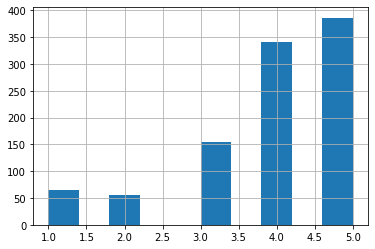

In [31]:
df['rating'].hist()

In [32]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

df.head()

,rating,text,y
0,4,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,1
1,4,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",1
2,4,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,1
3,5,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,1
4,5,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,1


In [33]:
df["y"].value_counts()

1    726
0    275
Name: y, dtype: int64

> Feature
  * 모델의 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타나는 tf_idf_vect로 대체하겠습니다.

In [34]:
from sklearn.model_selection import train_test_split
 
x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((700, 3599), (700,), (301, 3599), (301,))

Logistic

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [37]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.72
precision: 0.72
recall: 1.00
F1: 0.84


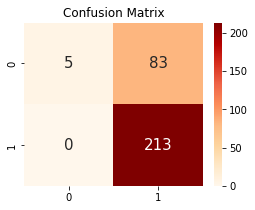

In [38]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 모델 평가결과를 살펴보면, 모델이 지나치게 긍정(“1”)으로만 예측하는 경향이 있습니다.
# 따라서 긍정 리뷰를 잘 예측하지만, 부정 리뷰에 대한 예측 정확도가 매우 낮습니다. 
# 이는 샘플데이터의 클래스 불균형으로 인한 문제로 보입니다.
# 따라서, 클래스 불균형 조정을 진행하겠습니다.


* 샘플링 재조정

In [39]:
df['y'].value_counts()

1    726
0    275
Name: y, dtype: int64

In [40]:
positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()

In [41]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [42]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((412, 3599), (412,), (138, 3599), (138,))

* 모델 재학습

In [43]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [44]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.72
precision: 0.70
recall: 0.74
F1: 0.72


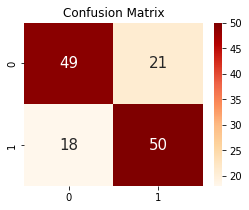

In [45]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 이제 모델이 “긍정적인” 케이스와 “부정적인” 케이스를 모두 적당히 잘 맞춘 것을 확인할 수 있습니다.

* 긍정 / 부정 키워드 분석
  * 긍정 / 부정 키워드 분석 기계는 이처럼 리뷰 내용에 나타나는 사람의 감성을 구별할 수 있을 뿐만 아니라, 학습된 Logistic Regression 모델을 이용하여 긍/부정 키워드도 추출해낼 수 있습니다.
추출된 키워드를 통해서 이용자가 느끼는 제주호델의 장,단점을 파악할 수 있고, 이를 기반으로 앞으로 유지해야 할 좋은 서비스와 개선이 필요한 아쉬운 서비스에 대해서도 어느정도 판단할 수 있습니다.

In [46]:
lr2.coef_

array([[ 0.28196772,  0.10796991, -0.04978601, ...,  0.        ,
        -0.18315162,  0.28434689]])

<BarContainer object of 3599 artists>

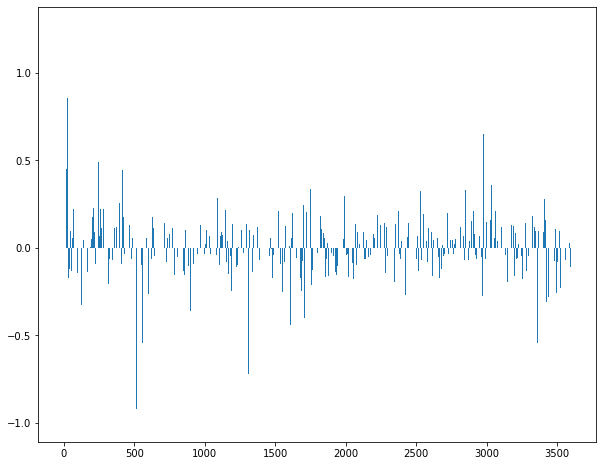

In [47]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

# 여기서 계수가 양인 경우는 단어가 긍정적인 영향을 미쳤다고 볼 수 있고, 반면에, 음인 경우는 부정적인 영향을 미쳤다고 볼 수 있습니다.

# 이 계수들을 크기순으로 정렬하면, 긍정 / 부정 키워드를 출력하는 지표가 되겠습니다.

* 먼저 "긍정 키워드"와 "부정 키워드"의 Top 5를 각각 출력해볼게요

In [48]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함
# 이처럼 단어의 coeficient와 index가 출력이 됩니다.

[(1.2644550507381787, 1217), (0.9079356150239053, 2400), (0.8956094720715209, 1148), (0.8859075267474583, 2730), (0.8795111499693719, 43)]
[(-0.7201222787741571, 1310), (-0.7519681298547072, 3022), (-0.8672956005075484, 567), (-0.9190158099937463, 515), (-0.9945592515966041, 2143)]


* 이제 전체 단어가 포함한 "긍정 키워드 리스트"와 "부정 키워드 리스트"를 정의하고 출력해볼게요

In [49]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.2644550507381787, 1217),
 (0.9079356150239053, 2400),
 (0.8956094720715209, 1148),
 (0.8859075267474583, 2730),
 (0.8795111499693719, 43),
 (0.8541915649753757, 26),
 (0.836254121256081, 578),
 (0.7714811231976705, 2957),
 (0.737528088973572, 1491),
 (0.7203390936359616, 956),
 (0.6503260268852227, 2977),
 (0.6488836121942876, 115),
 (0.6467914172687946, 910),
 (0.6264469987695738, 1159),
 (0.5943145305412955, 883),
 (0.5505354129422678, 2988),
 (0.5294632094678557, 692),
 (0.5240729254152497, 2455),
 (0.5207834696883537, 1922),
 (0.5153917648445299, 2361),
 (0.4937282553112394, 1215),
 (0.49360869707006794, 246),
 (0.48549198888140077, 680),
 (0.4854086392859415, 269),
 (0.4748702738145659, 686),
 (0.47035667493646055, 1194),
 (0.4589695403161365, 790),
 (0.4558660002258445, 2834),
 (0.4537280028129353, 19),
 (0.45005407955814675, 2779),
 (0.44412671542407905, 416),
 (0.44257202926523553, 1805),
 (0.43646847504262454, 263),
 (0.43085461242478346, 3267),
 (0.4255898116545533, 2797)

마지막으로 index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력해볼게요.

In [50]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{2866: '집중',
 3588: '휴식',
 2696: '제공',
 2311: '위치',
 1584: '선정',
 790: '또한',
 2927: '청소',
 2925: '청결',
 1527: '상태',
 2392: '이상',
 3022: '침대',
 2388: '이불',
 3021: '침구',
 299: '교체',
 2013: '어메니티',
 1296: '보강',
 1277: '베스트',
 2299: '웨스턴',
 3564: '회원',
 185: '경우',
 106: '객실',
 3009: '층수',
 2234: '요청',
 2606: '적극',
 1188: '반영',
 2837: '지인',
 1629: '소개',
 2910: '처음',
 611: '당황',
 1607: '세면',
 675: '도구',
 2555: '잠옷',
 3358: '필수',
 361: '그것',
 2673: '정도',
 578: '다음',
 2074: '여기',
 1171: '박만',
 2595: '저녁',
 981: '맥주',
 3414: '한잔',
 838: '렌트',
 791: '뚜벅',
 1159: '바로',
 1247: '버스',
 2676: '정류',
 697: '도착',
 24: '가방',
 2487: '일찍',
 2685: '정비',
 1225: '방이',
 2500: '입실',
 2038: '업그레이드',
 2849: '직원',
 2680: '정말',
 1148: '바다',
 2623: '전망',
 2636: '전일',
 3425: '함덕',
 624: '대명',
 3091: '콘도',
 1861: '실내',
 1384: '분위기',
 1659: '손님',
 40: '가장',
 1241: '배치',
 651: '대해',
 634: '대응',
 1889: '써비스',
 2730: '조식',
 1351: '부분',
 1838: '신경',
 1922: '아주',
 3208: '특급',
 3191: '트랜디',
 210: '고민',
 3593: '흔적',
 2082: '여

In [51]:
# 긍정
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

방문 1.2644550507381787
이용 0.9079356150239053
바다 0.8956094720715209
조식 0.8859075267474583
가족 0.8795111499693719
가성 0.8541915649753757
다음 0.836254121256081
최고 0.7714811231976705
사장 0.737528088973572
맛집 0.7203390936359616
추천 0.6503260268852227
거리 0.6488836121942876
마음 0.6467914172687946
바로 0.6264469987695738
리조트 0.5943145305412955
출장 0.5505354129422678
도움 0.5294632094678557
인테리어 0.5240729254152497
아주 0.5207834696883537
의사 0.5153917648445299


In [52]:
# 부정
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

예약 -0.9945592515966041
냄새 -0.9190158099937463
다른 -0.8672956005075484
침대 -0.7519681298547072
보이 -0.7201222787741571
최악 -0.7142499739127354
에어컨 -0.6786616478611768
별로 -0.6742178511586063
찾기 -0.6584721911054098
취소 -0.6464141509409322
사람 -0.6451323735594591
정도 -0.6240099604615805
사진 -0.6089303470147719
대부분 -0.5889712626646347
다시 -0.5601302753897155
대해 -0.5518124209379022
노후 -0.5484791097700695
느낌 -0.5423970967095598
필요 -0.5413974621071783
문제 -0.528774612366749


* 키워드 파악 결과
  * 이용객들이 보통 제주 호텔의 바다뷰 혹은 바다 접근성, 주변 맛집 그리고 인테리어 등에 만족하는 것으로 보입니다.
하지만 숙소의 냄새 그리고 침대, 에어컨 등 시설의 상태가 많이 아쉬워 보이고 개선이 필요해보입니다.